Pandas-交叉表和透视表

In [1]:
#导入NumPy包
import numpy as np
#导入Pandas包
import pandas as pd

In [2]:
#导入数据
stock=pd.read_csv('stock_day.csv')

#准备星期列
date=pd.to_datetime(stock.index)
stock['weekday']=date.weekday
#准备上涨与否列
stock['rise_or_not']=np.where(stock['p_change']>0,1,0)

In [3]:
stock

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,weekday,rise_or_not
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16,4,1
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19,3,1
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30,2,1
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76,1,1


In [4]:
#频数交叉表
pd.crosstab(stock['weekday'],stock['rise_or_not'])

rise_or_not,0,1
weekday,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [5]:
#频率交叉表
pd.crosstab(stock['weekday'],stock['rise_or_not'],normalize='index')

rise_or_not,0,1
weekday,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


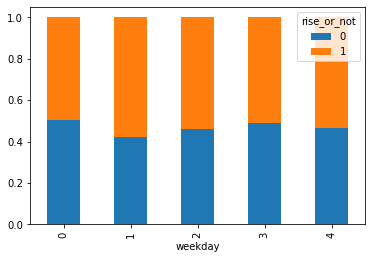

In [6]:
#频率交叉表的堆叠柱状图（stacked设置为True表示柱状图堆叠）
pd.crosstab(stock['weekday'],stock['rise_or_not'],normalize='index').plot(kind="bar", stacked=True)

In [7]:
#透视表（索引列取值所对应的平均数）
stock.pivot_table(['rise_or_not'], index=['weekday'])

,rise_or_not
weekday,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433
